##Методические указания

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
from sklearn.datasets import make_classification
X,y = make_classification (n_samples=1000,
                          n_features=2,
                          n_informative=2,
                          n_redundant=0,
                          n_classes=2,
                          class_sep=2,
                          random_state=1)


In [15]:
pd.DataFrame(X).head()


,0,1
0,1.863411,0.087646
1,-1.530997,1.901182
2,-0.017224,-2.591112
3,-2.032039,-1.801162
4,4.620555,0.901124


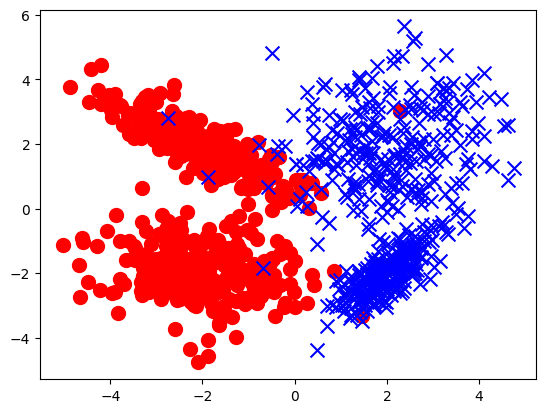

In [16]:
plt.scatter(X[:, 0][y==0], X[:, 1][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 0][y==1], X[:, 1][y==1], marker="x", c='b', s=100)
plt.show()


In [17]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.b = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, b, b_grad):
        return b - self._alpha * b_grad

    def optimize(self, X, y, start_b, n_iters):
        b = start_b.copy()
        for i in range(n_iters):
            b_grad = self.grad_func(X, y, b)
            b = self.gradient_step(b, b_grad)
        return b

    def fit(self, X, y):
        m = X.shape[1]
        start_b = np.ones(m)
        self.b = self.optimize(X, y, start_b, self._n_iters)


In [18]:
class LogReg(SGD):
    def sigmoid(self, X, b):
        return 1. / (1. + np.exp(-X.dot(b)))

    def grad_func(self, X, y, b):
        n = X.shape[0]
        grad = 1. / n * X.transpose().dot(self.sigmoid(X, b) - y)
        return grad

    def predict_proba(self, X):
        return self.sigmoid(X, self.b)

    def predict(self, X):
        y_pred = self.predict_proba(X) > 0.5
        return y_pred


In [20]:
logreg = LogReg()


In [21]:
X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])


In [22]:
logreg.fit(X, y)
y_pred = logreg.predict(X)


In [23]:
from sklearn.metrics import accuracy_score, f1_score
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'accuracy = {ac:.2f} F1-score = {f1:.2f}')


accuracy = 0.98 F1-score = 0.98


In [ ]:
y_pred_proba = logreg.predict_proba(X_test)


In [25]:
xx, yy = np.meshgrid(
    np.arange(X.min(axis=0)[1]-1, X.max(axis=0)[1]+1, 0.01),
    np.arange(X.min(axis=0)[2]-1, X.max(axis=0)[2]+1, 0.01))
XX = np.array(list(zip(xx.ravel(), yy.ravel()))).reshape((-1, 2))
XX = np.array([(1, *xx) for xx in XX])


In [26]:
Z = logreg.predict_proba(XX)
Z = Z.reshape(xx.shape)


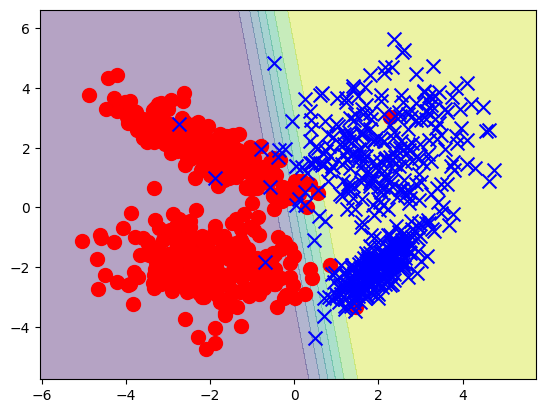

In [27]:
plt.contourf(xx, yy, Z, alpha=0.4)
plt.scatter(X[:, 1][y==0], X[:, 2][y==0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y==1], X[:, 2][y==1], marker="x", c='b', s=100)


In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()


In [30]:
model.fit(X, y)
y_pred_lr = model.predict(X)


##Задания для самостоятельного выполнения

#### 1. Выведите результаты работы библиотечной модели - в численном и в графическом виде.

Библиотечная модель: accuracy = 0.98, F1-score = 0.98


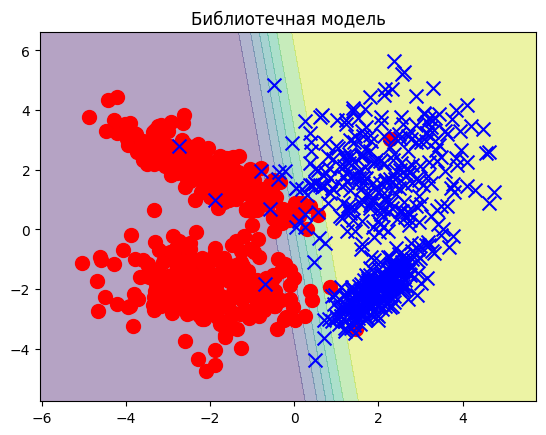

In [32]:
ac_lr = accuracy_score(y, y_pred_lr)
f1_lr = f1_score(y, y_pred_lr)
print(f'Библиотечная модель: accuracy = {ac_lr:.2f}, F1-score = {f1_lr:.2f}')

Z_lr = model.predict_proba(XX)[:, 1]
Z_lr = Z_lr.reshape(xx.shape)

plt.contourf(xx, yy, Z_lr, alpha=0.4)
plt.scatter(X[:, 1][y == 0], X[:, 2][y == 0], marker="o", c='r', s=100)
plt.scatter(X[:, 1][y == 1], X[:, 2][y == 1], marker="x", c='b', s=100)
plt.title('Библиотечная модель')
plt.show()


#### 2. Проверьте работу модели с другими значениями скорости обучения. Найдите значение, при котором градиентный спуск расходится.

In [38]:
alphas = [0.00001, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 1.5, 2.0, 50, 100]

for alpha in alphas:
    logreg = LogReg(alpha=alpha)
    X = np.hstack([np.ones(X.shape[0])[:, np.newaxis], X])
    logreg.fit(X, y)

    y_pred = logreg.predict(X)
    ac = accuracy_score(y, y_pred)
    f1 = f1_score(y, y_pred)
    print(f'alpha={alpha}: accuracy = {ac:.2f}, F1-score = {f1:.2f}')


alpha=1e-05: accuracy = 0.50, F1-score = 0.67
alpha=0.0001: accuracy = 0.50, F1-score = 0.67
alpha=0.001: accuracy = 0.50, F1-score = 0.67
alpha=0.01: accuracy = 0.98, F1-score = 0.98
alpha=0.1: accuracy = 0.98, F1-score = 0.98
alpha=0.5: accuracy = 0.98, F1-score = 0.98
alpha=1.0: accuracy = 0.98, F1-score = 0.98
alpha=1.5: accuracy = 0.98, F1-score = 0.98
alpha=2.0: accuracy = 0.98, F1-score = 0.98
alpha=50: accuracy = 0.98, F1-score = 0.98
alpha=100: accuracy = 0.98, F1-score = 0.98


<ipython-input-18-761b167f9349>:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))
<ipython-input-18-761b167f9349>:3: RuntimeWarning: overflow encountered in exp
  return 1. / (1. + np.exp(-X.dot(b)))


####3. Модифицируйте код модели таким образом, чтобы фиктивный столбец единиц добавлялся к матрице признаков внутри класса.

In [49]:
class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, theta, gradient):
        return theta - self._alpha * gradient

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            gradient = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, gradient)
        return theta

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1. / (1. + np.exp(-X.dot(theta)))

    def grad_func(self, X, y, theta):
        n = X.shape[0]
        gradient = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return gradient

    def add_bias(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y):
        X = self.add_bias(X)
        super().fit(X, y)

    def predict_proba(self, X):
        X = self.add_bias(X)
        return self.sigmoid(X, self.theta)

    def predict(self, X):
        X = self.add_bias(X)
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

X, y = make_classification(n_samples=1000,
                           n_features=2,
                           n_informative=2,
                           n_redundant=0,
                           n_classes=2,
                           class_sep=2,
                           random_state=1)

logreg = LogReg()
logreg.fit(X, y)

y_pred = logreg.predict(X)
ac = accuracy_score(y, y_pred)
f1 = f1_score(y, y_pred)
print(f'Model: accuracy = {ac:.2f}, F1-score = {f1:.2f}')


Model: accuracy = 0.98, F1-score = 0.98


#### 4. Поэкспериментируйте с разными значениями параметра class_sep при генерации датасета. Визуализируйте полученные распределения. Сделайте вывод о том, как этот параметр влияет на точность получаемых моделей.

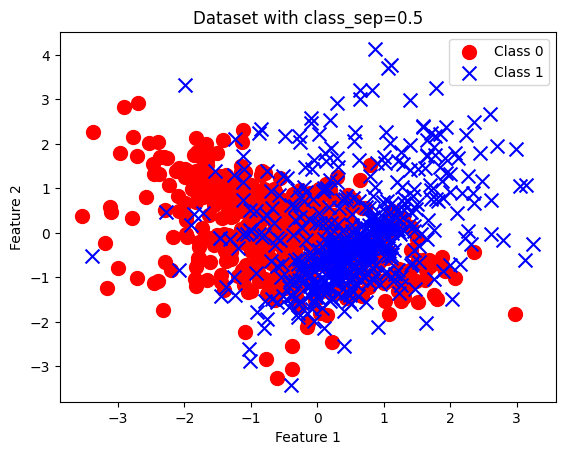

Model accuracy with class_sep=0.5: 0.73


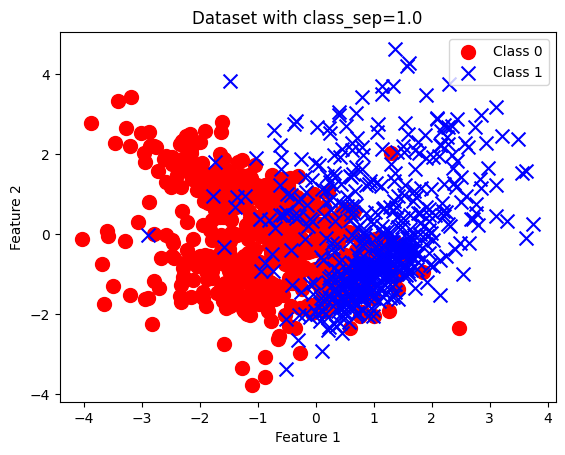

Model accuracy with class_sep=1.0: 0.86


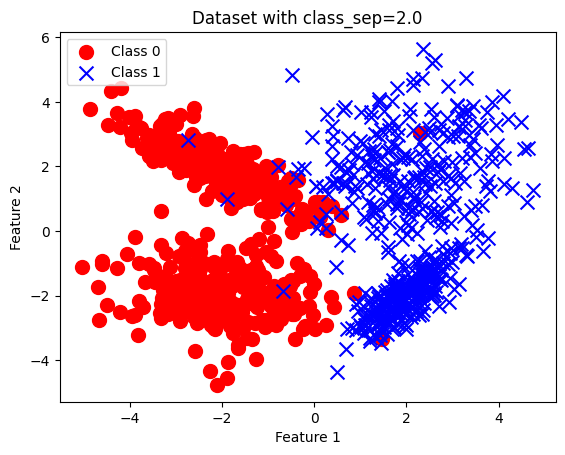

Model accuracy with class_sep=2.0: 0.97


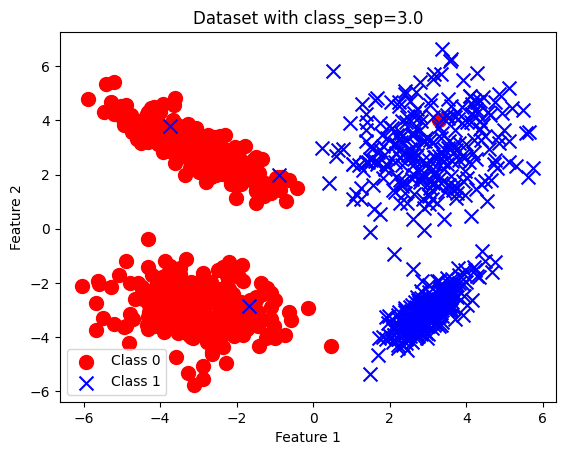

Model accuracy with class_sep=3.0: 1.00


In [51]:
from sklearn.model_selection import train_test_split

class SGD():
    def __init__(self, alpha=0.5, n_iters=1000):
        self.theta = None
        self._alpha = alpha
        self._n_iters = n_iters

    def gradient_step(self, theta, gradient):
        return theta - self._alpha * gradient

    def optimize(self, X, y, start_theta, n_iters):
        theta = start_theta.copy()
        for i in range(n_iters):
            gradient = self.grad_func(X, y, theta)
            theta = self.gradient_step(theta, gradient)
        return theta

    def fit(self, X, y):
        X = np.hstack([np.ones((X.shape[0], 1)), X])
        m = X.shape[1]
        start_theta = np.ones(m)
        self.theta = self.optimize(X, y, start_theta, self._n_iters)

class LogReg(SGD):
    def sigmoid(self, X, theta):
        return 1. / (1. + np.exp(-X.dot(theta)))

    def grad_func(self, X, y, theta):
        n = X.shape[0]
        gradient = 1. / n * X.transpose().dot(self.sigmoid(X, theta) - y)
        return gradient

    def add_bias(self, X):
        return np.hstack([np.ones((X.shape[0], 1)), X])

    def fit(self, X, y):
        X = self.add_bias(X)
        super().fit(X, y)

    def predict_proba(self, X):
        X = self.add_bias(X)
        return self.sigmoid(X, self.theta)

    def predict(self, X):
        X = self.add_bias(X)
        y_pred = self.predict_proba(X) > 0.5
        return y_pred

def generate_and_evaluate(class_sep):
    X, y = make_classification(n_samples=1000,
                               n_features=2,
                               n_informative=2,
                               n_redundant=0,
                               n_classes=2,
                               class_sep=class_sep,
                               random_state=1)

    plt.scatter(X[:, 0][y == 0], X[:, 1][y == 0], marker="o", c='r', label='Class 0', s=100)
    plt.scatter(X[:, 0][y == 1], X[:, 1][y == 1], marker="x", c='b', label='Class 1', s=100)
    plt.title(f'Dataset with class_sep={class_sep}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.legend()
    plt.show()

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    logreg = LogReg()
    logreg.fit(X_train, y_train)

    # Предсказание и вычисление метрик на тестовом наборе
    y_pred = logreg.predict(X_test)
    ac = accuracy_score(y_test, y_pred)
    print(f'Model accuracy with class_sep={class_sep}: {ac:.2f}')

class_seps = [0.5, 1.0, 2.0, 3.0]
for class_sep in class_seps:
    generate_and_evaluate(class_sep)


#### 5. Сгенерируйте датасет с большим числом признаков и примените к нему созданную модель.

In [57]:
X, y = make_classification(n_samples=1000,
                           n_features=10,  # Увеличим количество информативных признаков
                           n_informative=10,
                           n_redundant=0,
                           n_classes=2,
                           class_sep=2,
                           random_state=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogReg()
logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)
ac = accuracy_score(y_test, y_pred)
print(f'Model accuracy on dataset with 10 features: {ac:.2f}')

Model accuracy on dataset with 10 features: 0.98


#### 6.

In [58]:
model = LogisticRegression(multi_class='ovr', solver='liblinear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f'Model ccuracy: {accuracy:.3f}')

Model ccuracy: 0.985


In [60]:
X, y = make_classification(n_samples=1000,
                           n_features=5,
                           n_informative=5,
                           n_redundant=0,
                           n_classes=5,
                           random_state=1)

model = LogisticRegression(max_iter=1000)
model.fit(X, y)

y_pred_proba = model.predict_proba(X)

class_names = [f'Class {i}' for i in range(len(model.classes_))]
df = pd.DataFrame(data=y_pred_proba, columns=class_names)
df.index.name = 'Object'
print("Predicted Probabilities for Each Class:")
print(df)

Predicted Probabilities for Each Class:
         Class 0   Class 1   Class 2   Class 3   Class 4
Object                                                  
0       0.433842  0.101587  0.057078  0.281530  0.125963
1       0.303469  0.365935  0.042176  0.033423  0.254998
2       0.564048  0.124009  0.153447  0.119697  0.038799
3       0.025793  0.091493  0.218990  0.127988  0.535737
4       0.040563  0.035473  0.282405  0.485340  0.156219
...          ...       ...       ...       ...       ...
995     0.095566  0.026088  0.080366  0.591078  0.206902
996     0.120248  0.035410  0.176629  0.334397  0.333315
997     0.006497  0.009084  0.937622  0.010769  0.036028
998     0.080197  0.292854  0.131939  0.114996  0.380015
999     0.000546  0.018446  0.473920  0.021765  0.485323

[1000 rows x 5 columns]
